In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path


import sys
sys.path.insert(0, "/home/estengel/ambiguous_parsing/src/")
from ambiguous_parsing.eval.eval import get_df

In [19]:
CHECKPOINT_DIR= Path("/brtx/602-nvme1/estengel/ambiguous_parsing/logs/1.0/") 
# fol
fol_models_and_paths = [
    ("pp", "codegen-16B_lamp_no_context_all_pp_fol_0_test_eval_constrained_bs_5_np_full"),
    ("scope", "codegen-16B_lamp_no_context_all_scope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("revscope", "codegen-16B_lamp_no_context_all_revscope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("bound", "codegen-16B_lamp_no_context_all_bound_fol_0_test_eval_constrained_bs_5_np_full"),
    ("conj", "codegen-16B_lamp_no_context_all_conj_fol_0_test_eval_constrained_bs_5_np_full")
]

In [22]:
big_df = []
for amb_type, path in fol_models_and_paths:
    fol_test_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_fol/test.jsonl"
    fol_eval_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_fol/test_eval.jsonl"
    pred_path = CHECKPOINT_DIR / path
    try:
        df = get_df(fol_test_path, fol_eval_path, pred_path, is_fol=True)
        df['model'] = "codegen-16B"
        df['amb_type'] =  amb_type
        # df['model_order'] = model_order.index(model_name)
        df['is_fol'] = True
        big_df.append(df)
    except (FileNotFoundError, IndexError) as e:
        print(f"Skipping {amb_type}")
        continue

big_df = pd.concat(big_df)

0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
0 = 0.00 are missing a first output
2 = 1.00 are missing a second output


In [23]:
big_df.head()

,type,key,value,model,amb_type,is_fol
0,pp,pred_top_1_matches_correct,60,codegen-16B,pp,True
1,pp,pred_top_2_matches_correct,23,codegen-16B,pp,True
2,pp,pred_top_1_matches_other,0,codegen-16B,pp,True
3,pp,pred_top_2_matches_other,0,codegen-16B,pp,True
4,pp,pred_top_1_matches_either,60,codegen-16B,pp,True


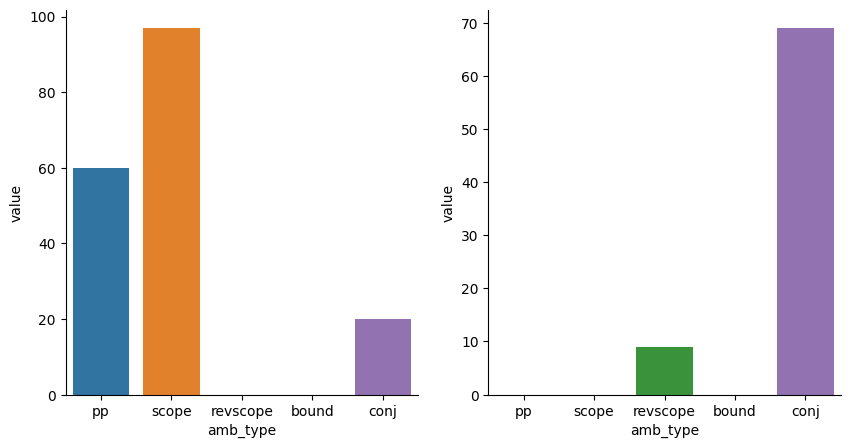

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

lf1_df = big_df[big_df['key'] == "pred_top_1_matches_correct"]
lf2_df = big_df[big_df['key'] == "pred_top_1_matches_other"]
sns.barplot(data = lf1_df, x = "amb_type", y = "value", ax = ax[0])
sns.barplot(data = lf2_df, x = "amb_type", y = "value", ax = ax[1])

sns.despine()